<a href="https://colab.research.google.com/github/samuelalmanza-17/proyecto_cip_2025/blob/main/Proyecto_CIP_Samuel_Almanza_21_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Instalación de Librerías**
Instalamos paquetes necesarios para el análisis de datos y modelado.

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost --quiet
print("✅ Librerías instaladas")

✅ Librerías instaladas


# **2. Carga de Datos**
Importamos el dataset y exploramos su estructura básica.

In [ ]:
import pandas as pd
import numpy as np

# Cargar archivo CSV
df = pd.read_csv('Quality_of_Life.csv')

# Exploración inicial
print("\n🔍 Estructura del dataset:")
print(f"- Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n📋 Primeras filas:")
display(df.head(3))
print("\n📊 Tipos de datos y valores faltantes:")
print(df.info())


🔍 Estructura del dataset:
- Filas: 236, Columnas: 19

📋 Primeras filas:


,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'



📊 Tipos de datos y valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to I

# **3. Limpieza de Datos**
Preparamos los datos para el modelado eliminando columnas y valores no útiles.

#3.1: Eliminar columnas categóricas (solo conservamos valores numéricos)

In [ ]:
columnas_a_eliminar = [col for col in df.columns if 'Category' in col]
df_clean = df.drop(columns=columnas_a_eliminar)
print("\n🗑️ Columnas eliminadas:", columnas_a_eliminar)


🗑️ Columnas eliminadas: ['Purchasing Power Category', 'Safety Category', 'Health Care Category', 'Climate Category', 'Cost of Living Category', 'Property Price to Income Category', 'Traffic Commute Time Category', 'Pollution Category', 'Quality of Life Category']


# PASO 3.2: Limpieza especial de 'Quality of Life Value'

In [ ]:
# Convertir a string y eliminar caracteres no numéricos
df_clean['Quality of Life Value'] = (
    df_clean['Quality of Life Value']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Regex para mantener solo números y puntos
    .replace('', np.nan)                     # Cadenas vacías -> NaN
    .astype(float)                           # Conversión final a numérico
)

# PASO 3.3: Eliminar filas con valores faltantes

In [ ]:
print("\n⚠️ Valores faltantes antes:", df_clean.isnull().sum().sum())
df_clean = df_clean.dropna()
print("✅ Valores faltantes después:", df_clean.isnull().sum().sum())


⚠️ Valores faltantes antes: 0
✅ Valores faltantes después: 0


# **4. Análisis Exploratorio (EDA)**
Visualizamos distribuciones y relaciones entre variables.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# GRÁFICO 4.1: Histogramas de variables numéricas

<Figure size 1400x1000 with 0 Axes>

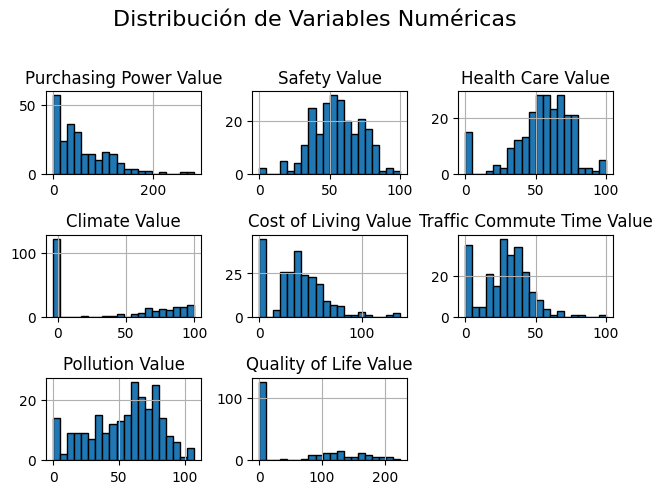

In [ ]:
plt.figure(figsize=(14, 10))
df_clean.drop(columns=['country']).hist(bins=20, layout=(3, 3), edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# GRÁFICO 4.2: Matriz de correlación

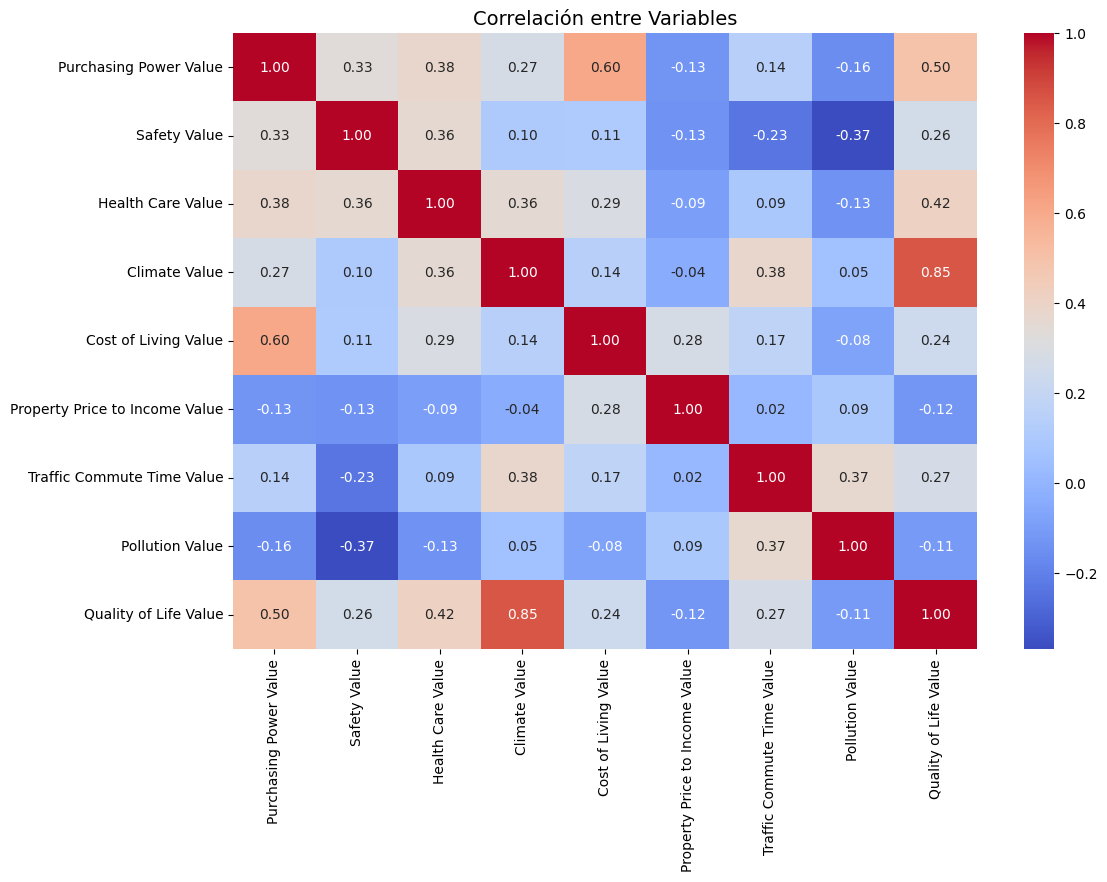

In [ ]:
for col in df_clean.drop(columns=['country']).columns:
    if df_clean[col].dtype == 'object':  # Verificar si la columna es de tipo objeto (cadena)
        # Eliminar comas y comillas simples, luego convertir a flotante
        df_clean[col] = df_clean[col].str.replace(',', '', regex=True)  # Eliminar comas
        df_clean[col] = df_clean[col].str.replace("'", '', regex=True)  # Eliminar comillas simples
        df_clean[col] = df_clean[col].astype(float)                     # Convertir a flotante

# Calcular la matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df_clean.drop(columns=['country']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlación entre Variables', fontsize=14)
plt.show()

# GRÁFICO 4.3: Gráficos de dispersión (scatter plots)

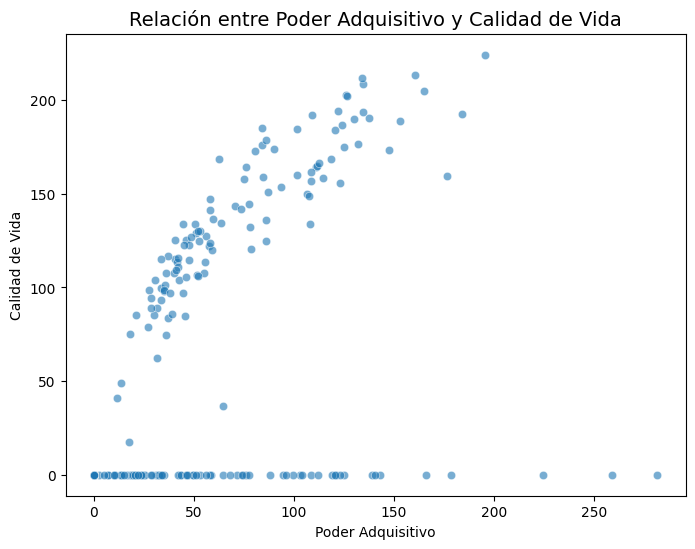

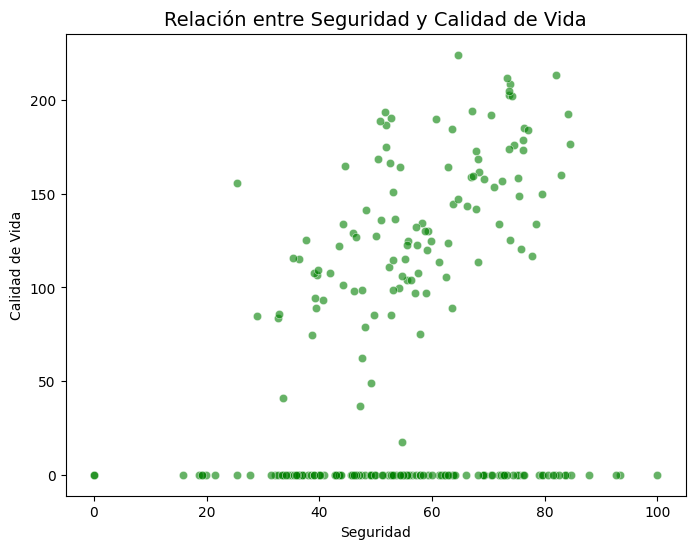

In [ ]:
# Relación entre "Purchasing Power Value" y "Quality of Life Value"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Purchasing Power Value', y='Quality of Life Value', data=df_clean, alpha=0.6)
plt.title('Relación entre Poder Adquisitivo y Calidad de Vida', fontsize=14)
plt.xlabel('Poder Adquisitivo')
plt.ylabel('Calidad de Vida')
plt.show()

# Relación entre "Safety Value" y "Quality of Life Value"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Safety Value', y='Quality of Life Value', data=df_clean, alpha=0.6, color='green')
plt.title('Relación entre Seguridad y Calidad de Vida', fontsize=14)
plt.xlabel('Seguridad')
plt.ylabel('Calidad de Vida')
plt.show()

# GRÁFICO 4.4: Gráficos de caja (boxplots)

<ipython-input-103-60ea61fc979a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Safety Value', y='Quality of Life Value', data=df_clean, palette='viridis')


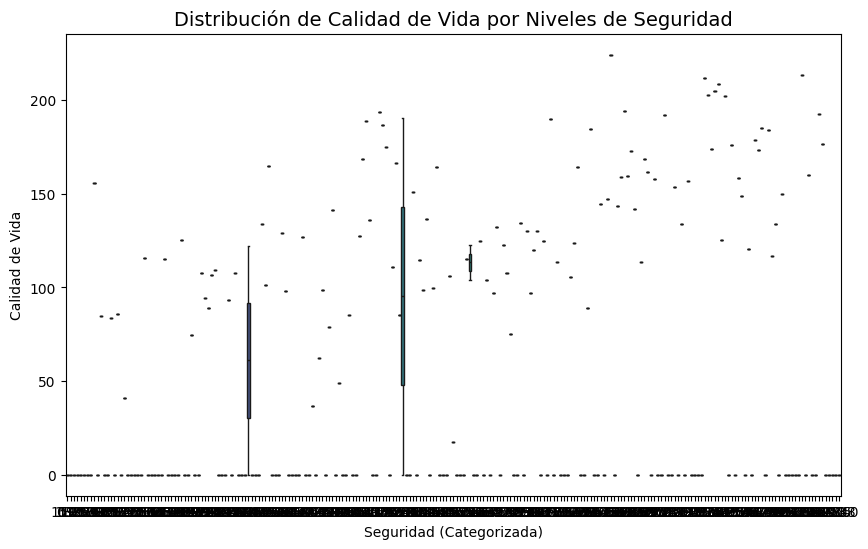

<ipython-input-103-60ea61fc979a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health Care Value', y='Quality of Life Value', data=df_clean, palette='magma')


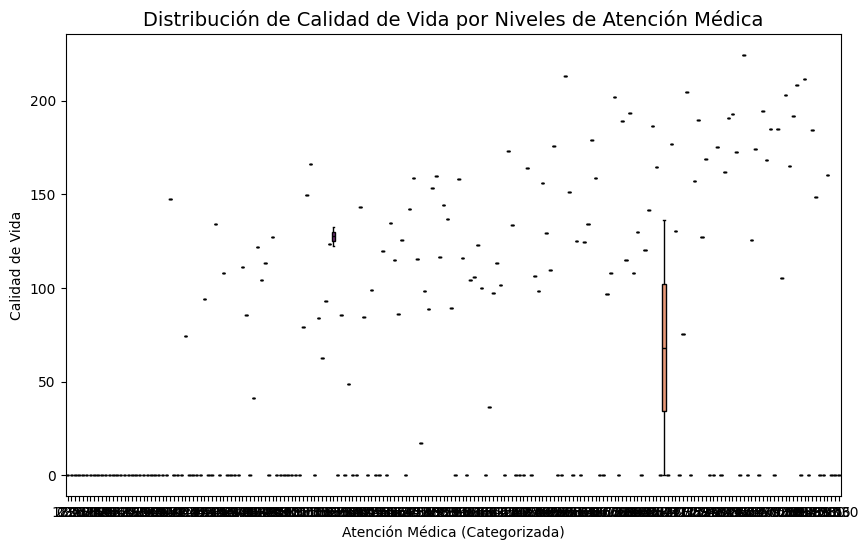

In [ ]:
# Distribución de "Quality of Life Value" por niveles de "Safety Value"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Safety Value', y='Quality of Life Value', data=df_clean, palette='viridis')
plt.title('Distribución de Calidad de Vida por Niveles de Seguridad', fontsize=14)
plt.xlabel('Seguridad (Categorizada)')
plt.ylabel('Calidad de Vida')
plt.show()

# Distribución de "Quality of Life Value" por niveles de "Health Care Value"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health Care Value', y='Quality of Life Value', data=df_clean, palette='magma')
plt.title('Distribución de Calidad de Vida por Niveles de Atención Médica', fontsize=14)
plt.xlabel('Atención Médica (Categorizada)')
plt.ylabel('Calidad de Vida')
plt.show()

# GRÁFICO 4.5: Gráficos de barras para comparar variables

<ipython-input-104-14981e792c20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='Quality of Life Value', data=top_10_countries, palette='coolwarm')


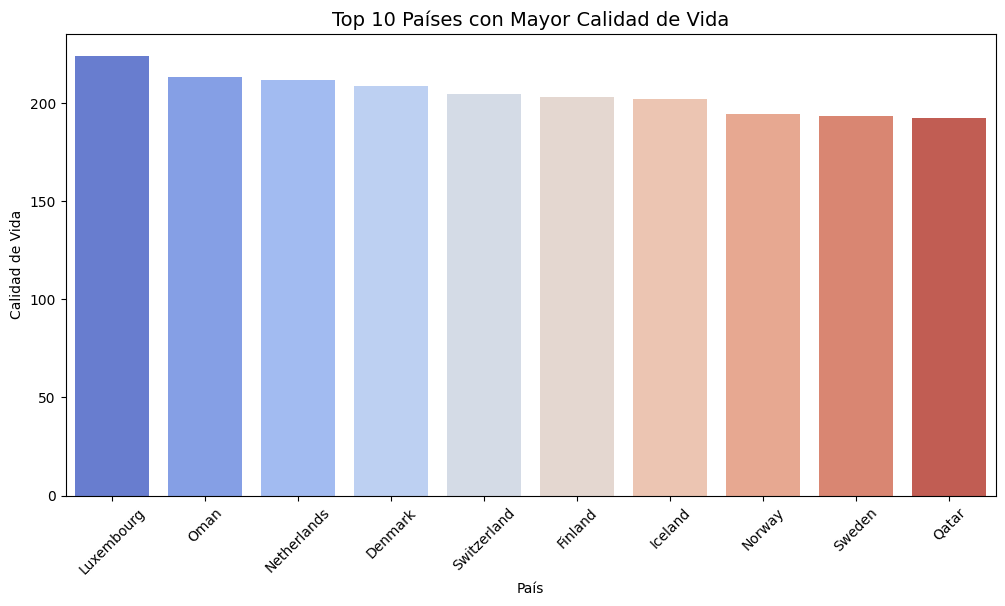

<ipython-input-104-14981e792c20>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='Pollution Value', data=top_10_polluted, palette='Reds')


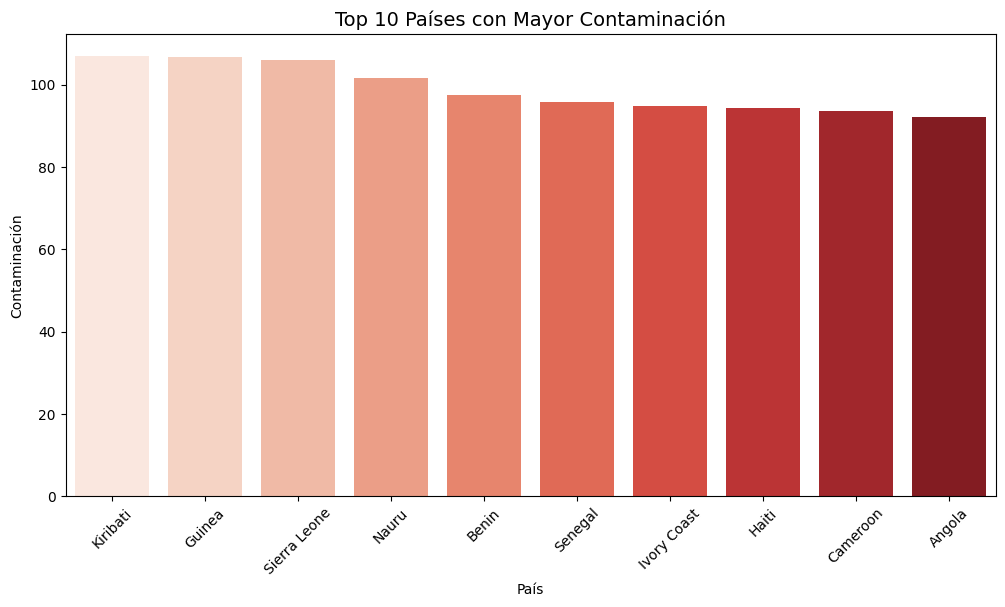

In [ ]:
# Comparación de "Quality of Life Value" por país (Top 10)
top_10_countries = df_clean.nlargest(10, 'Quality of Life Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Quality of Life Value', data=top_10_countries, palette='coolwarm')
plt.title('Top 10 Países con Mayor Calidad de Vida', fontsize=14)
plt.xlabel('País')
plt.ylabel('Calidad de Vida')
plt.xticks(rotation=45)
plt.show()

# Comparación de "Pollution Value" por país (Top 10 más contaminados)
top_10_polluted = df_clean.nlargest(10, 'Pollution Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Pollution Value', data=top_10_polluted, palette='Reds')
plt.title('Top 10 Países con Mayor Contaminación', fontsize=14)
plt.xlabel('País')
plt.ylabel('Contaminación')
plt.xticks(rotation=45)
plt.show()

# **5. Preparación de Datos para Modelado**
Dividimos los datos en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Variable objetivo (y) y características (X)
X = df_clean.drop(columns=['country', 'Quality of Life Value'])
y = df_clean['Quality of Life Value']

# División 80-20 con semilla para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\n📊 Dimensiones de los conjuntos:")
print(f"- Entrenamiento: {X_train.shape[0]} filas")
print(f"- Prueba: {X_test.shape[0]} filas")


📊 Dimensiones de los conjuntos:
- Entrenamiento: 188 filas
- Prueba: 48 filas


# **6. Entrenamiento de Modelos**
Implementamos y comparamos tres algoritmos de Machine Learning.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Diccionario para almacenar resultados
resultados = {}

# ==============================================================================
# MODELO 6.1: Regresión Lineal (Línea base)
# ==============================================================================
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
resultados['Regresión Lineal'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R²': r2_score(y_test, y_pred_lr)
}

# ==============================================================================
# MODELO 6.2: Random Forest (Árboles de decisión)
# ==============================================================================
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
resultados['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R²': r2_score(y_test, y_pred_rf)
}

# ==============================================================================
# MODELO 6.3: XGBoost (Algoritmo avanzado)
# ==============================================================================
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
resultados['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'R²': r2_score(y_test, y_pred_xgb)
}

# Mostrar resultados en tabla
resultados_df = pd.DataFrame(resultados).T
print("\n📈 Comparación de Modelos:")
display(resultados_df)


📈 Comparación de Modelos:


,MSE,R²
Regresión Lineal,926.105348,0.826761
Random Forest,81.731489,0.984711
XGBoost,180.583551,0.966220


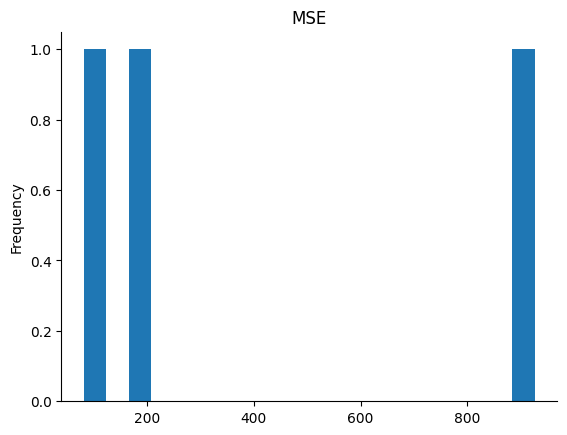

In [ ]:
# @title MSE

from matplotlib import pyplot as plt
resultados_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

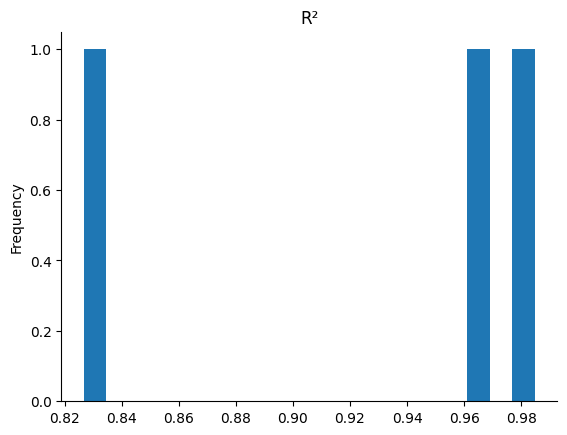

In [ ]:
# @title R²

from matplotlib import pyplot as plt
resultados_df['R²'].plot(kind='hist', bins=20, title='R²')
plt.gca().spines[['top', 'right',]].set_visible(False)

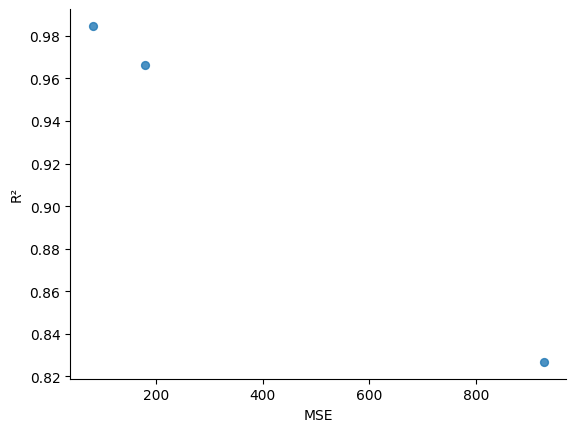

In [ ]:
# @title MSE vs R²

from matplotlib import pyplot as plt
resultados_df.plot(kind='scatter', x='MSE', y='R²', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

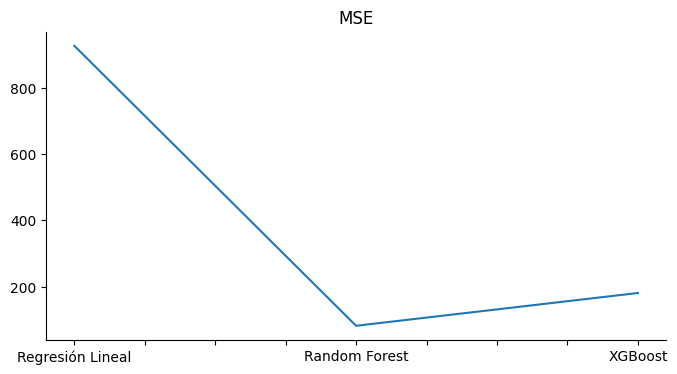

In [ ]:
# @title MSE

from matplotlib import pyplot as plt
resultados_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

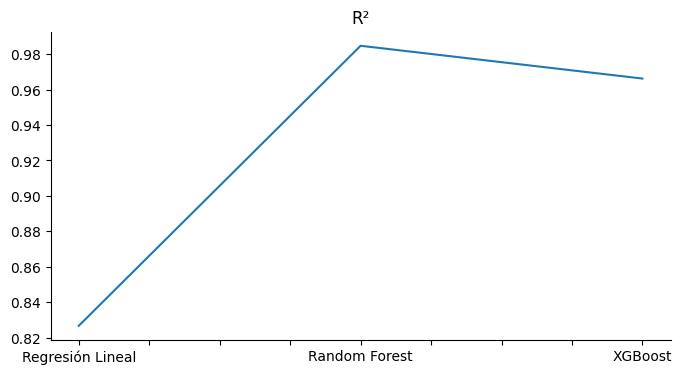

In [ ]:
# @title R²

from matplotlib import pyplot as plt
resultados_df['R²'].plot(kind='line', figsize=(8, 4), title='R²')
plt.gca().spines[['top', 'right']].set_visible(False)

# **7. Optimización del Mejor Modelo**
Mejoramos XGBoost con ajuste de hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200],    # Número de árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5]            # Profundidad máxima
}

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,                          # 3 folds de validación
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

# Resultados de la optimización
print("\n🔍 Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar modelo optimizado
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test)
print("\n🚀 Rendimiento del modelo optimizado:")
print(f"- MSE: {mean_squared_error(y_test, y_pred_opt):.2f}")
print(f"- R²: {r2_score(y_test, y_pred_opt):.2f}")



🔍 Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

🚀 Rendimiento del modelo optimizado:
- MSE: 224.12
- R²: 0.96


# **8. Visualización de Resultados**
Gráficos comparativos y diagnóstico del modelo.

<ipython-input-113-ccf869625ff5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados_df.index, y='R²', data=resultados_df, palette='viridis')


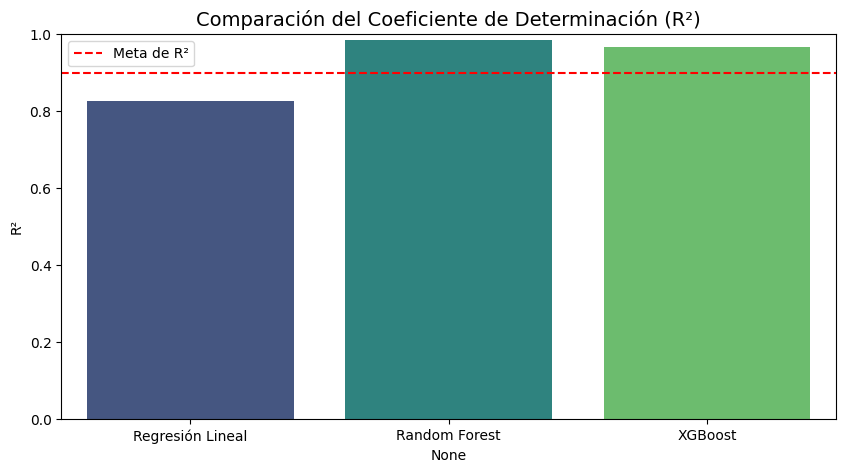

In [ ]:
# ==============================================================================
# GRÁFICO 8.1: Comparación de R² entre modelos
# ==============================================================================
plt.figure(figsize=(10, 5))
sns.barplot(x=resultados_df.index, y='R²', data=resultados_df, palette='viridis')
plt.axhline(0.9, color='red', linestyle='--', label='Meta de R²')
plt.title('Comparación del Coeficiente de Determinación (R²)', fontsize=14)
plt.ylim(0, 1)
plt.legend()
plt.show()